### Dendrograms

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

- Ex.1 Plot the data.
- Ex.2 Use the Means function with k=2 to assign points to clusters.

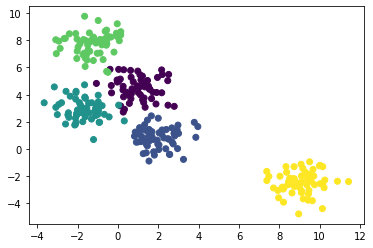

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y_true)

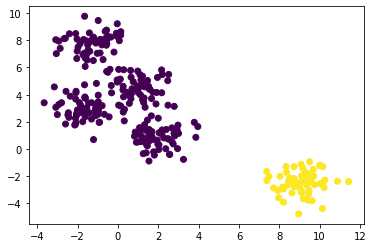

In [4]:
from sklearn.cluster import k_means

_, label, _ = k_means(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=label)

Ex.3 Use the scipy libraries to draw the dendrogram for the data:

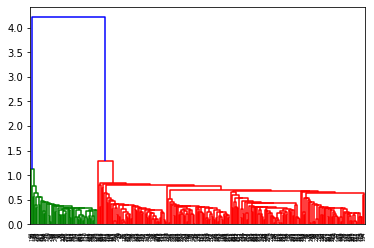

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

lnk = linkage(X)
dnd = dendrogram(lnk)

Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

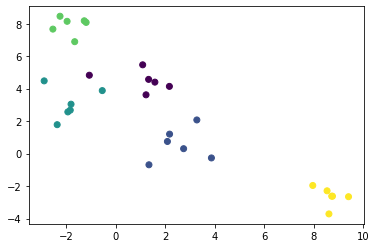

In [6]:
X, y_true = make_blobs(n_samples=30, centers=5, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true)

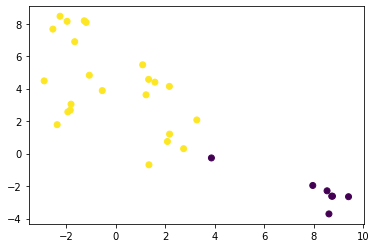

In [7]:
_, label, _ = k_means(X,2)
plt.scatter(X[:, 0], X[:, 1], c=label)

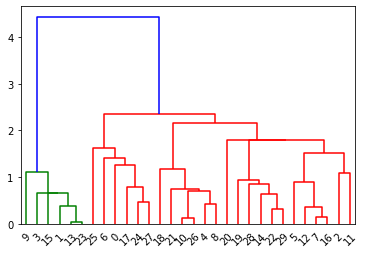

In [10]:
lnk = linkage(X)
dnd = dendrogram(lnk)

### Agglomerative clustering

In [11]:
import pandas as pd

data = pd.read_csv("shopping_data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [12]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]]

Ex.6 Create a dendrogram to chose the appropriate k value.

Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).

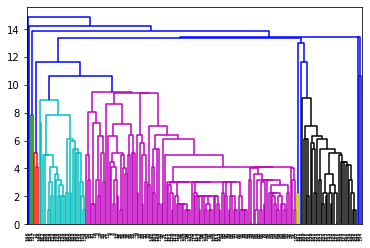

In [13]:
lnk = linkage(X, method='single')
dnd = dendrogram(lnk)

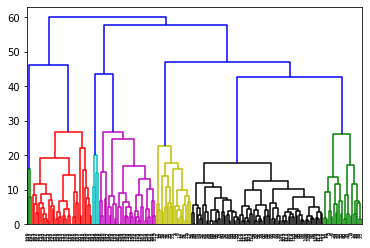

In [14]:
lnk = linkage(X, method='average')
dnd = dendrogram(lnk)

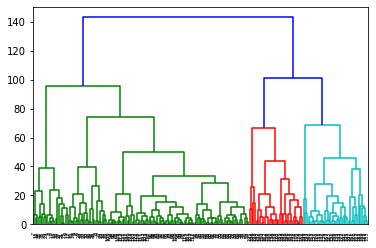

In [15]:
lnk = linkage(X, method='complete')
dnd = dendrogram(lnk)

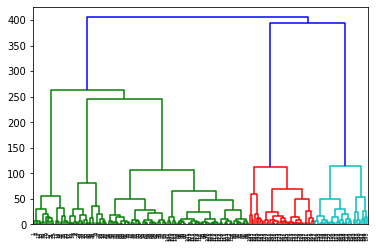

In [16]:
lnk = linkage(X, method='ward')
dnd = dendrogram(lnk)

Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

Ex.9 Plot the clusters to see how actually our data has been clustered.

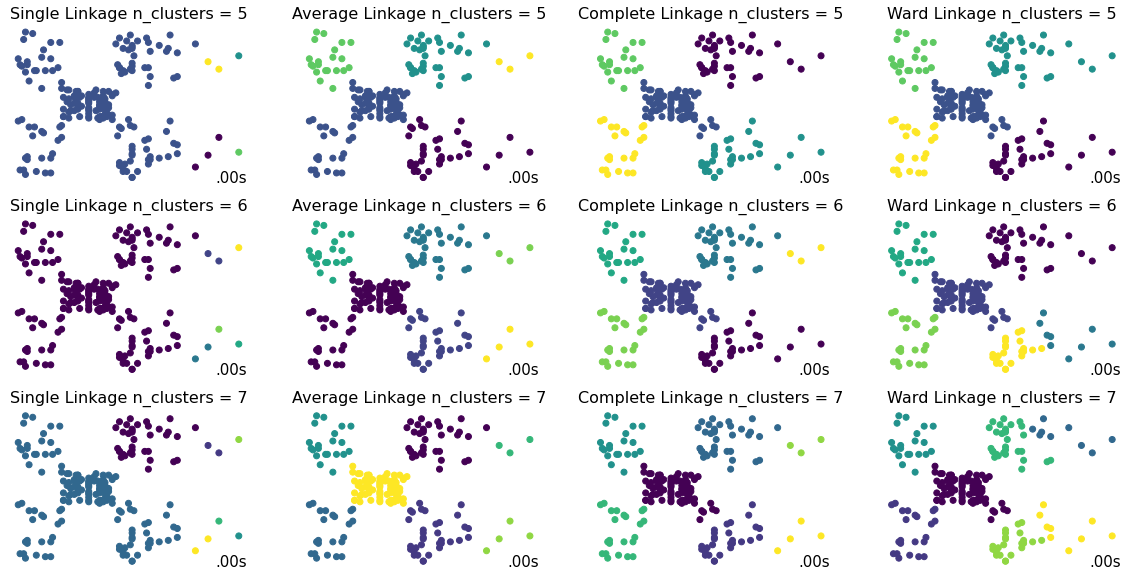

In [17]:
from sklearn.cluster import AgglomerativeClustering
import time
import numpy as np

clustering_algorithms = (
    ('Single Linkage', "single"),
    ('Average Linkage', "average"),
    ('Complete Linkage', "complete"),
    ('Ward Linkage', "ward"),
)

X = np.array(X)
plt.figure(figsize=(20, 10))
plot_num = 1

for n_clusters in range(5, 8):
    for name, linkage in clustering_algorithms:
        algorithm = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        plt.subplot(3, len(clustering_algorithms), plot_num)
        plt.title(name + " n_clusters = " + str(n_clusters), size=16)
        plt.scatter(X[:, 0], X[:, 1], c=algorithm.labels_)
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.axis('off')
        plot_num += 1

In my opinion, the best results are given by the ward linkage with 5 clusters - it clustered the data almost the same way I'd do it manually

### Selecting the number of clusters with silhouette analysis on KMeans clustering

Ex.1 Create the dataset:

In [18]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

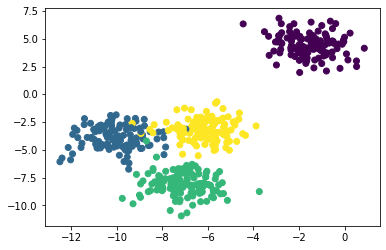

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Ex.2 Determine the cluster range [2,3….]

Ex.3 Iterate for all the values in cluster range:
- Perform k-Means
- Calculate and print the silhouette_score
- Compute the silhouette scores for each sample more
- #Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot
- Have a look here to check you solution and plot the silhouette plot more

I was basing on this example: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


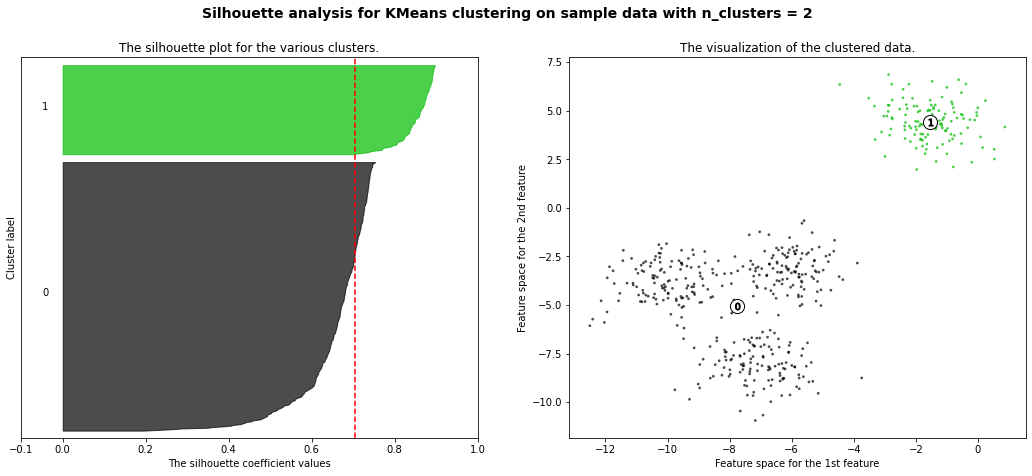

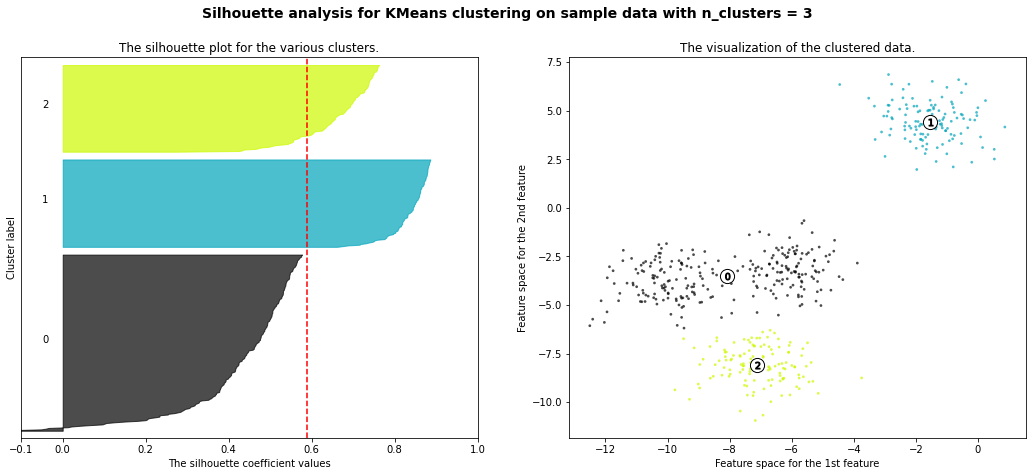

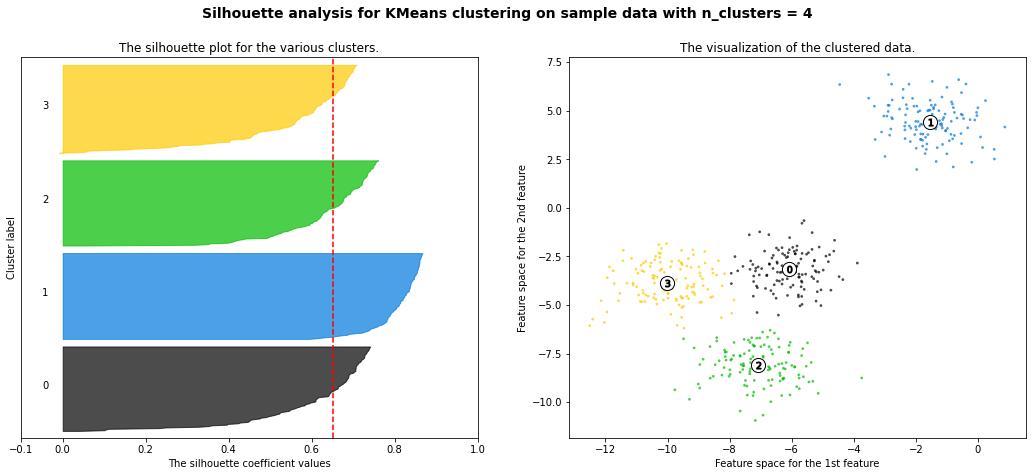

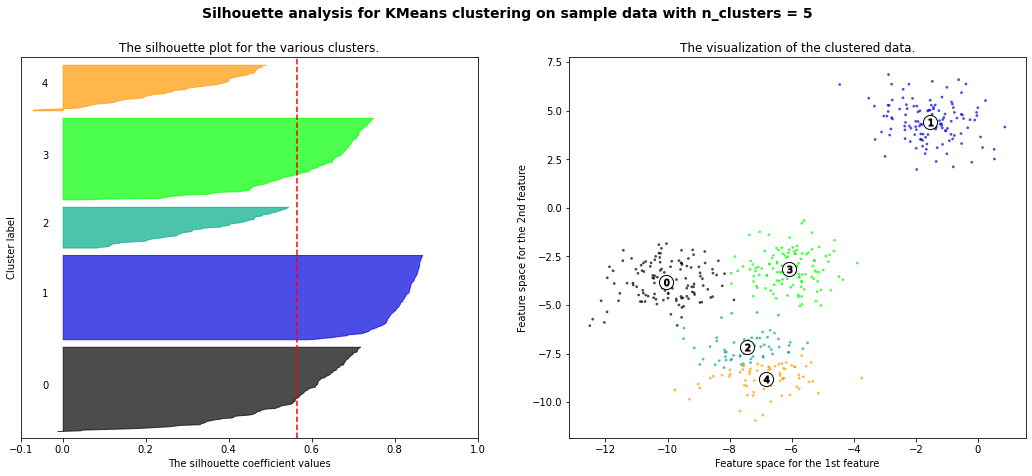

In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### DBSCAN algorithm

Ex.1 Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:

In [21]:
from sklearn import  datasets
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

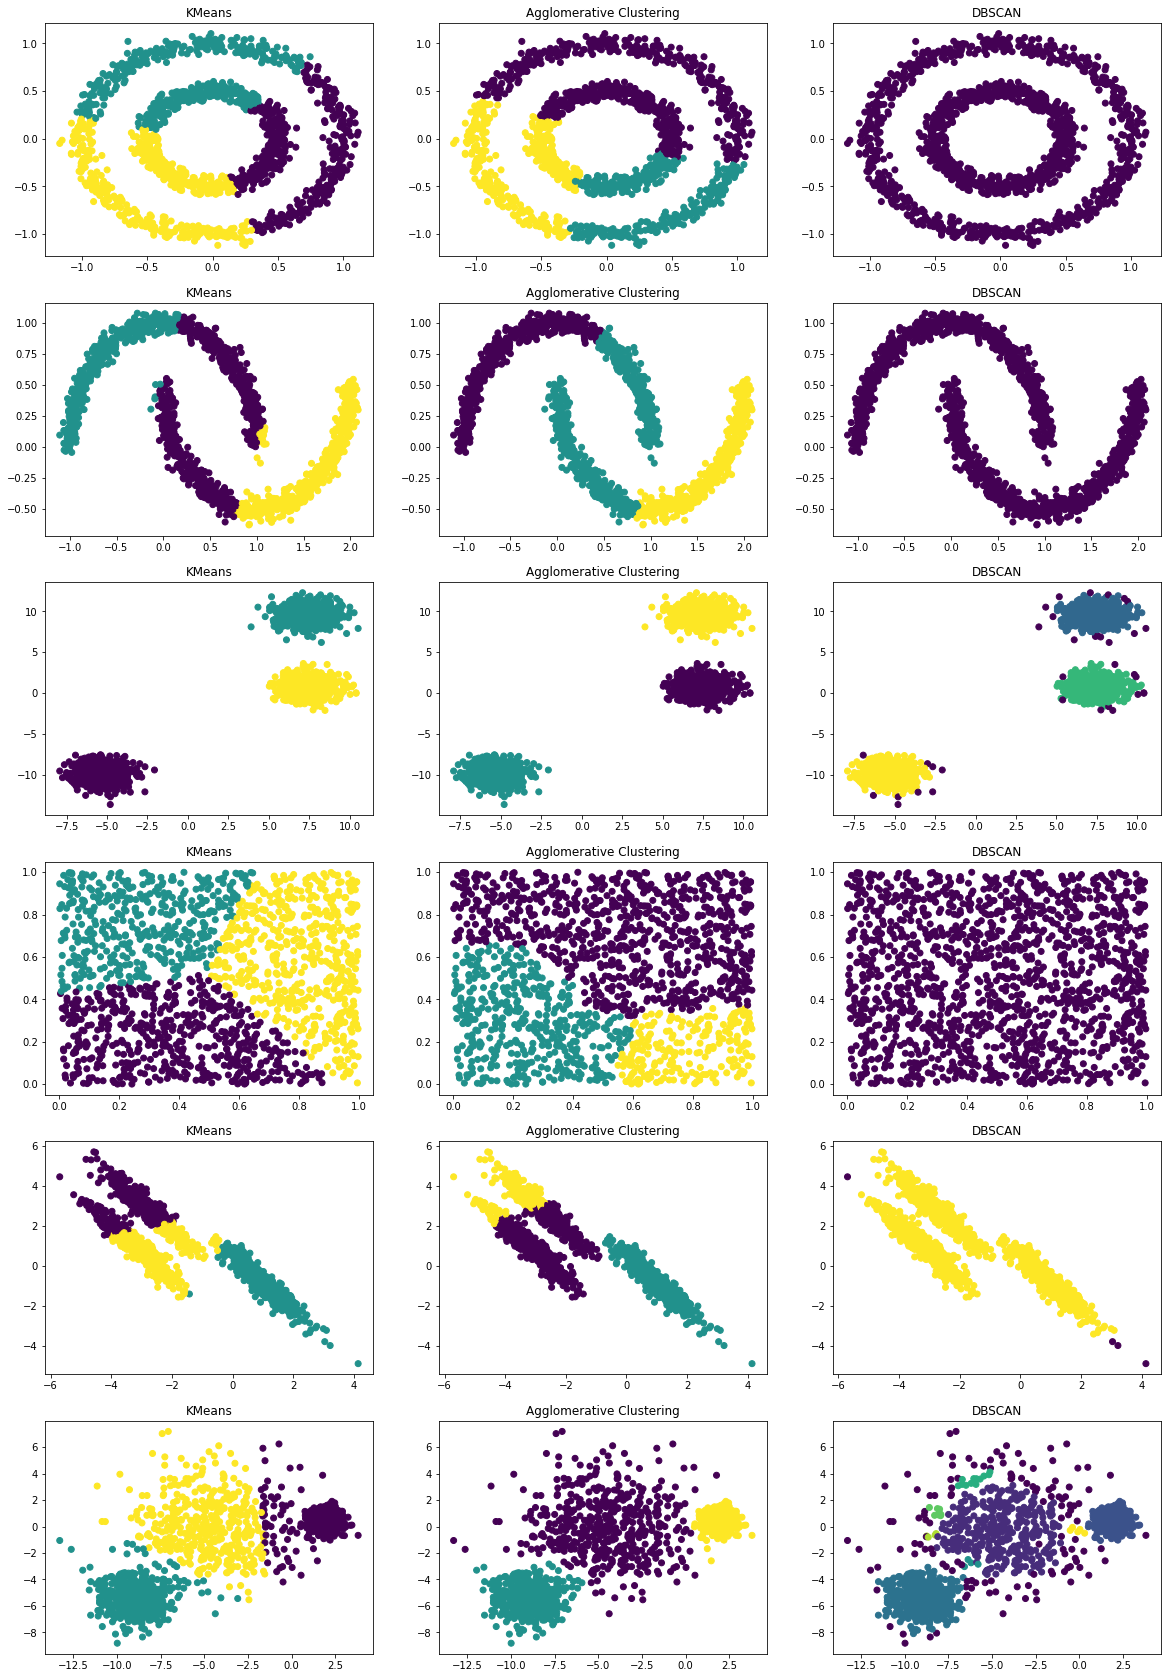

In [24]:
from sklearn.cluster import KMeans, DBSCAN

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
plot_num = 1
plt.figure(figsize=(20, 30))
for dataset in datasets:
    y_pred_km = KMeans(n_clusters=5).fit_predict(dataset[0], dataset[1])
    y_pred_ag = AgglomerativeClustering(n_clusters=5).fit_predict(dataset[0] ,dataset[1])
    y_pred_db = DBSCAN().fit_predict(dataset[0], dataset[1])
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_km)
    plt.title("KMeans")
    plot_num += 1
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_ag)
    plt.title("Agglomerative Clustering")
    plot_num += 1
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_db)
    plt.title("DBSCAN")
    plot_num += 1

None of the algorithms satisfy me enough. I tried KMeans and Agglomerative for 2 and 3 clusters too, but some results (e.g. moons) weren't any better.

Although DBSCAN doesn't need clusters count provided, it doesn't infer it any better. I'm disappointed.